# Explore here

In [23]:
# Your code here
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from numpy.random import seed, choice
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
# Leemos el csv
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Split the dataset into features and target variable. Then, we split the data into training and testing sets.

In [19]:
# Cogemos la variable objetivo para realizar nuestro entrenamiento
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# We build a RandomForest classifier and train it on the training data. Next, we evaluate the model on the test set.

In [25]:
# Paso 2: Construcción del Random Forest y entrenamiento del modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predicción sobre el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluación del modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [ ]:
#La precisión es 0.72 (o 72%), lo que indica que el modelo predice correctamente alrededor del 72% de las instancias en general.
#Para la clase 0, la precisión, la exhaustividad y la puntuación F1 son relativamente altas (alrededor de 0.78–0.79), lo que sugiere que el modelo identifica de manera confiable los casos negativos.
#Para la clase 1, las métricas son más bajas (alrededor de 0.61–0.62), lo que indica que el modelo tiene más dificultad para identificar correctamente los casos positivos.

In [26]:
# Definimos y analizamos el impacto de hiperparámetros definiendo un diccionario para los valores
param_grid = {
    'n_estimators': [50, 100, 200],  #Numero de arboles que usara el random ofrerst
    'max_depth': [None, 10, 20], # limite de profuncidad
    'min_samples_split': [2, 5, 10], # numero minimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4] # numero minimo de muestras
}

# Entrenamos mutliples modelos con todas las combinaciones posibles de los hipers
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado en el anterior
best_rf = grid_search.best_estimator_
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"Mejor Precisión: {grid_search.best_score_:.2f}")

Mejores Hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor Precisión: 0.78


In [27]:
# Evaluación del mejor modelo
y_pred_best = best_rf.predict(X_test)
print(f"Accuracy del Mejor Modelo: {accuracy_score(y_test, y_pred_best):.2f}")
print(classification_report(y_test, y_pred_best))

Accuracy del Mejor Modelo: 0.73
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



Aunque la mejora general es modesta, el modelo ajustado con hiperparámetros muestra un equilibrio ligeramente mejor entre precisión y exhaustividad, especialmente para la clase 1. Esto indica que el modelo optimizado es un poco más eficaz en la identificación de casos positivos, lo que puede ser crucial dependiendo del contexto de la aplicación. Sin embargo, se requieren mejoras adicionales.

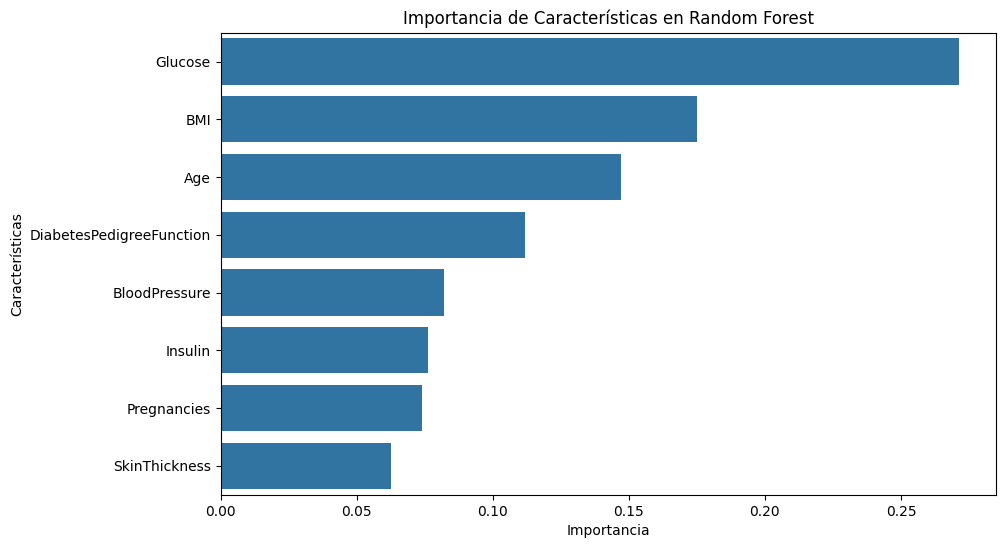

In [30]:
# Visulaziamos la importancia de cada caracteristica generado con el modelo de random forest
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Importancia de Características en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()
